In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

In [2]:
df = pd.read_csv('train.csv', index_col=0)
df.dropna(inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [3]:
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.drop('cabin',axis =1,inplace=True)
df.drop('ticket',axis =1,inplace=True)
df['age'].fillna(df['age'].mean(), inplace = True)
embark = pd.get_dummies(df['embarked'],drop_first=True)

In [4]:
#inspect the df
df.shape

(183, 9)

In [5]:
#Selecting the target 

y = df['survived']
y

PassengerId
2      1
4      1
7      0
11     1
12     1
      ..
872    1
873    0
880    1
888    1
890    1
Name: survived, Length: 183, dtype: int64

In [6]:
#labelling the sex column and turning them into numeric values

df['sex']=df['sex'].replace(['male'],0)
df['sex']=df['sex'].replace(['female'],1)

In [7]:
#Selecting input features

X = df[['age', 'pclass', 'sex', 'fare']]
X

,age,pclass,sex,fare
PassengerId,,,,
2,38.0,1,1,71.2833
4,35.0,1,1,53.1000
7,54.0,1,0,51.8625
11,4.0,3,1,16.7000
12,58.0,1,1,26.5500
...,...,...,...,...
872,47.0,1,1,52.5542
873,33.0,1,0,5.0000
880,56.0,1,1,83.1583


In [8]:
##Train-test-split

X_train, X_test, y_train, y_test = train_test_split(X,y)
X_train.shape, X_test.shape

((137, 4), (46, 4))

In [9]:
#fit model

from sklearn.dummy import DummyClassifier
model = DummyClassifier(strategy='most_frequent') #initialize the model
model.fit(X_train, y_train)   # trains the model
model.score(X_train, y_train) # calculates accuracy

0.6715328467153284

In [10]:
#Testing the model on the test data

model.score(X_test, y_test)

0.6739130434782609

In [11]:
#predict

model.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [12]:
##Training the baseline model
#Train a Decision Tree with maximum depth 3 & fit

from sklearn.tree import DecisionTreeClassifier

m = DecisionTreeClassifier(max_depth= 3)
m.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [13]:
#calculate training and test accuracy
print('train acc', round(m.score(X_train, y_train), 3))
print('test acc ', round(m.score(X_test, y_test), 3))


train acc 0.847
test acc  0.739


In [14]:
###Building a Random Forest from Scratch

df.sample(3)
df_train = pd.concat([X_train, y_train], axis = 1)

In [15]:
forest = []

for i in range(100):
    sample = df_train.sample(50)
    X_test_sample = sample[['age', 'pclass', 'sex', 'fare']]
    y_test_sample = sample['survived']
    tree = DecisionTreeClassifier(max_depth = 3)
    tree.fit(X_test_sample, y_test_sample)
    forest.append(tree)
    print(i, 'tree score', round(tree.score(X_test, y_test), 2))

0 tree score 0.7
1 tree score 0.72
2 tree score 0.74
3 tree score 0.67
4 tree score 0.61
5 tree score 0.72
6 tree score 0.74
7 tree score 0.67
8 tree score 0.7
9 tree score 0.74
10 tree score 0.74
11 tree score 0.7
12 tree score 0.72
13 tree score 0.72
14 tree score 0.74
15 tree score 0.74
16 tree score 0.7
17 tree score 0.7
18 tree score 0.7
19 tree score 0.7
20 tree score 0.76
21 tree score 0.76
22 tree score 0.76
23 tree score 0.74
24 tree score 0.76
25 tree score 0.67
26 tree score 0.7
27 tree score 0.59
28 tree score 0.65
29 tree score 0.74
30 tree score 0.76
31 tree score 0.74
32 tree score 0.74
33 tree score 0.76
34 tree score 0.76
35 tree score 0.67
36 tree score 0.65
37 tree score 0.7
38 tree score 0.74
39 tree score 0.74
40 tree score 0.76
41 tree score 0.63
42 tree score 0.83
43 tree score 0.63
44 tree score 0.61
45 tree score 0.72
46 tree score 0.63
47 tree score 0.72
48 tree score 0.72
49 tree score 0.76
50 tree score 0.7
51 tree score 0.76
52 tree score 0.7
53 tree score 

In [16]:
##Calculate a list of training scores for all trees on the full training set
trains = [tree.score(X_train, y_train) for tree in forest]
trains

[0.7956204379562044,
 0.7737226277372263,
 0.8248175182481752,
 0.781021897810219,
 0.6934306569343066,
 0.8102189781021898,
 0.8248175182481752,
 0.7591240875912408,
 0.7883211678832117,
 0.7956204379562044,
 0.7956204379562044,
 0.7956204379562044,
 0.781021897810219,
 0.781021897810219,
 0.781021897810219,
 0.7883211678832117,
 0.7518248175182481,
 0.7883211678832117,
 0.781021897810219,
 0.8102189781021898,
 0.8175182481751825,
 0.8029197080291971,
 0.8321167883211679,
 0.8175182481751825,
 0.7883211678832117,
 0.7518248175182481,
 0.7372262773722628,
 0.7372262773722628,
 0.7153284671532847,
 0.8029197080291971,
 0.7883211678832117,
 0.8248175182481752,
 0.8102189781021898,
 0.7883211678832117,
 0.8321167883211679,
 0.7664233576642335,
 0.7299270072992701,
 0.7664233576642335,
 0.7883211678832117,
 0.7883211678832117,
 0.8029197080291971,
 0.7591240875912408,
 0.7153284671532847,
 0.7007299270072993,
 0.7737226277372263,
 0.8029197080291971,
 0.7372262773722628,
 0.802919708029197

In [17]:
##Calculate the mean training score
import numpy as np
print('mean train acc ', round(np.mean(trains), 3))

mean train acc  0.781


In [18]:
##Calculate the mean test score in the same way
tests = [tree.score(X_test, y_test) for tree in forest]
print('mean test acc ', round(np.mean(tests), 3))


mean test acc  0.712


In [19]:
###Majority Vote
# Create a list of predictions for every tree

pred = [tree.predict(X_test) for tree in forest]
all_pred = pd.DataFrame(pred)
all_pred

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,1,1,1,0,1,1,1,1,1,1,...,1,0,1,0,1,1,1,1,1,0
1,1,1,1,0,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,0
2,1,1,0,0,1,1,1,1,0,1,...,1,0,1,0,0,1,1,1,1,0
3,1,1,0,0,1,0,1,0,0,1,...,1,0,1,0,1,0,0,1,0,0
4,1,1,0,0,0,0,1,0,1,1,...,1,0,1,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,1,1,1,0,1,1,1,0,1,...,1,1,1,1,1,0,1,1,0,0
96,1,1,0,0,1,0,1,0,1,1,...,1,0,1,0,0,0,0,1,0,0
97,1,1,0,0,1,0,1,1,0,1,...,1,0,1,0,0,0,0,1,0,0
98,1,1,0,0,0,0,1,1,0,1,...,1,0,1,0,0,0,0,1,0,0


In [20]:
#Calculate accuracy from most frequent prediction on each data point
y_pred = all_pred.mode().T
overall_accuracy = accuracy_score(y_pred, y_test)
print('majority vote test score:', round(overall_accuracy,3))

majority vote test score: 0.739


In [21]:
overall_accuracy = accuracy_score(y_pred, y_test)
print('majority vote test score:', round(overall_accuracy,3))

majority vote test score: 0.739


In [22]:
#####RandomForest with Scikit#######
rand = RandomForestClassifier(n_estimators=100, max_depth=3)   
rand.fit(X_train, y_train)


RandomForestClassifier(max_depth=3)

In [23]:
round(rand.score(X_train, y_train),3)

0.839

In [24]:
round(rand.score(X_test, y_test),3)

0.761

In [25]:
y_pred = rand.predict(X_test)

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.53      0.59        15
           1       0.79      0.87      0.83        31

    accuracy                           0.76        46
   macro avg       0.73      0.70      0.71        46
weighted avg       0.75      0.76      0.75        46



In [27]:
importance = rand.feature_importances_

In [28]:
names= ('age', 'pclass', 'sex', 'fare')
# summarize feature importance
for i,v in zip(names, importance):
        print('%20s, Score: %.5f' % (i,v))

                 age, Score: 0.25749
              pclass, Score: 0.02875
                 sex, Score: 0.48737
                fare, Score: 0.22638


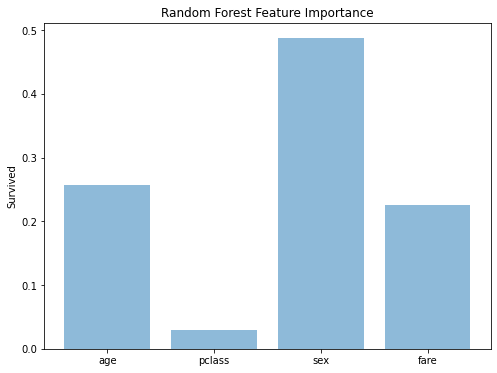

In [29]:
fig = plt.figure(figsize=(8,6))

plt.bar([x for x in range(len(importance))], importance, alpha=0.5 )
plt.title('Random Forest Feature Importance')


plt.xticks(range(4), ('age', 'pclass', 'sex', 'fare'))               
                                                                  
plt.ylabel('Survived')
plt.show()

In [30]:
print(confusion_matrix( y_test, y_pred))

[[ 8  7]
 [ 4 27]]


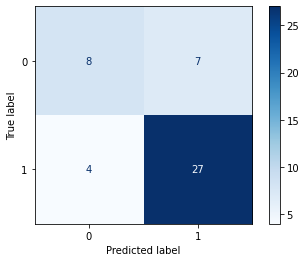

In [31]:
plot_confusion_matrix(rand, X_test, y_test, cmap=plt.cm.Blues)

In [32]:
pip install mlxtend


In [33]:
from mlxtend.plotting import plot_decision_regions
from matplotlib import cm

In [34]:
Xa=X.to_numpy()
Xa
ya=y.to_numpy()

C:\Users\49178\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:244: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


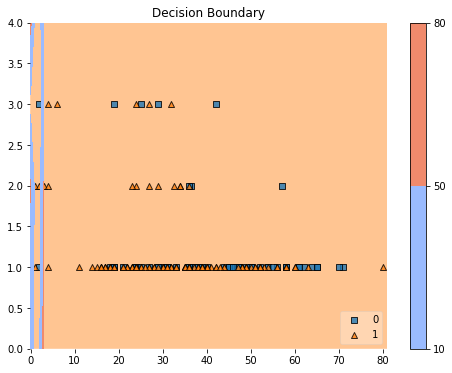

In [35]:
fig = plt.figure(figsize=(8,6))
feat_labels = ['age', 'pclass', 'sex', 'fare']
for clf in zip([rand]):                
    rand.fit(Xa, ya)
    fig = plot_decision_regions(Xa, ya, rand, filler_feature_values={0: 4000, 1: 4000, 2: 4000, 3: 4000},
                      filler_feature_ranges={0: 8000, 1: 8000, 2: 8000, 3: 8000}, 
                                legend=4) 
cf = plt.contourf(Xa,ya, levels=[10, 50, 80], cmap=cm.coolwarm)
plt.colorbar()
plt.title('Decision Boundary')
plt.show()


In [36]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [42]:
import numpy as np
import os
import xgboost as xgb
import xgboost

In [43]:
from sklearn.model_selection import RandomizedSearchCV


In [44]:
classifier=xgboost.XGBClassifier(tree_method='hist')   #call a classifier
# tree method is a tree construction algorithm used in XGBoost
#XGBoost supports approx, hist and gpu_hist for distributing trainig.

In [45]:
#set all possible parameters to find a best combination

params={"learning_rate":[0.10,0.15,0.20,0.25,0.30],   #how fast we want our model to move 
        "max_depth":[6,8,10,12,15],               #the maximum tree depth
        "min_child_weight":[2,4,6,8],                         #min sum of distance
        "gamma":[0.1,0.2,0.3,0.4,0.5],      #min loss reduction required to make a further partition
                                             #on a leaf node of the tree
        "colsample_bytree":[0.3,0.4,0.5,0.6]       #is the sub sample ratio of 
                                               #columns while constructing each tree
       }

clf=RandomizedSearchCV(classifier, param_distributions=params, n_iter=5, scoring='roc_auc',cv=5, verbose=3)
#randomized search on hyper parameters, that gives us the best possible combination, 
#the cross validated search over parameters
#scoring= so it's the ideal point between the true positives and the false positives
#cv=Determines the cross-validation splitting strategy. 
#Controls the verbosity: the higher, the more messages.

#fitting the model
clf.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] min_child_weight=8, max_depth=10, learning_rate=0.2, gamma=0.4, colsample_bytree=0.5 
[15:04:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  min_child_weight=8, max_depth=10, learning_rate=0.2, gamma=0.4, colsample_bytree=0.5, score=0.875, total=   0.1s
[CV] min_child_weight=8, max_depth=10, learning_rate=0.2, gamma=0.4, colsample_bytree=0.5 
[15:04:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  min_child_wei

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\49178\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\49178\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_cla


[CV] min_child_weight=8, max_depth=10, learning_rate=0.2, gamma=0.4, colsample_bytree=0.5 
[15:04:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  min_child_weight=8, max_depth=10, learning_rate=0.2, gamma=0.4, colsample_bytree=0.5, score=0.696, total=   0.0s
[CV] min_child_weight=8, max_depth=10, learning_rate=0.2, gamma=0.4, colsample_bytree=0.5 
[15:04:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  min_child_weight=8, max_depth=10, learning_rate=0.2, gamma=0.4, colsampl

C:\Users\49178\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\49178\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\49178\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 


[CV] min_child_weight=8, max_depth=12, learning_rate=0.25, gamma=0.5, colsample_bytree=0.6 
[15:04:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  min_child_weight=8, max_depth=12, learning_rate=0.25, gamma=0.5, colsample_bytree=0.6, score=0.768, total=   0.1s
[CV] min_child_weight=8, max_depth=12, learning_rate=0.25, gamma=0.5, colsample_bytree=0.6 
[15:04:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  min_child_weight=8, max_depth=12, learning_rate=0.25, gamma=0.5, cols

C:\Users\49178\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\49178\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\49178\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV]  min_child_weight=6, max_depth=6, learning_rate=0.2, gamma=0.2, colsample_bytree=0.4, score=0.853, total=   0.1s
[CV] min_child_weight=6, max_depth=6, learning_rate=0.2, gamma=0.2, colsample_bytree=0.4 
[15:04:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  min_child_weight=6, max_depth=6, learning_rate=0.2, gamma=0.2, colsample_bytree=0.4, score=0.820, total=   0.1s
[CV] min_child_weight=6, max_depth=6, learning_rate=0.2, gamma=0.2, colsample_bytree=0.4 
[15:04:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'

C:\Users\49178\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\49178\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\49178\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV]  min_child_weight=6, max_depth=6, learning_rate=0.2, gamma=0.2, colsample_bytree=0.4, score=0.866, total=   0.0s
[CV] min_child_weight=4, max_depth=8, learning_rate=0.3, gamma=0.2, colsample_bytree=0.3 
[15:04:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  min_child_weight=4, max_depth=8, learning_rate=0.3, gamma=0.2, colsample_bytree=0.3, score=0.840, total=   0.1s
[CV] min_child_weight=4, max_depth=8, learning_rate=0.3, gamma=0.2, colsample_bytree=0.3 
[15:04:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'

C:\Users\49178\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\49178\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[CV] min_child_weight=4, max_depth=8, learning_rate=0.3, gamma=0.2, colsample_bytree=0.3 
[15:04:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  min_child_weight=4, max_depth=8, learning_rate=0.3, gamma=0.2, colsample_bytree=0.3, score=0.792, total=   0.1s
[CV] min_child_weight=4, max_depth=8, learning_rate=0.3, gamma=0.2, colsample_bytree=0.3 
[15:04:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  min_child_weight=4, max_depth=8, learning_rate=0.3, gamma=0.2, colsample_by

C:\Users\49178\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\49178\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\49178\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV]  min_child_weight=4, max_depth=12, learning_rate=0.1, gamma=0.5, colsample_bytree=0.5, score=0.880, total=   0.1s
[CV] min_child_weight=4, max_depth=12, learning_rate=0.1, gamma=0.5, colsample_bytree=0.5 
[15:04:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  min_child_weight=4, max_depth=12, learning_rate=0.1, gamma=0.5, colsample_bytree=0.5, score=0.820, total=   0.1s
[CV] min_child_weight=4, max_depth=12, learning_rate=0.1, gamma=0.5, colsample_bytree=0.5 
[15:04:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if 

C:\Users\49178\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\49178\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\49178\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 


[CV]  min_child_weight=4, max_depth=12, learning_rate=0.1, gamma=0.5, colsample_bytree=0.5, score=0.861, total=   0.1s
[15:04:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    1.4s finished
C:\Users\49178\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           

In [46]:
clf.best_params_   #find best parameters

{'min_child_weight': 8,
 'max_depth': 10,
 'learning_rate': 0.2,
 'gamma': 0.4,
 'colsample_bytree': 0.5}

In [47]:
#run another xgboost classifier and then feed these parameters down here  
# this function over here makes it easy to test it again . 

clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=10,
              min_child_weight=8, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='hist', validate_parameters=1, verbosity=None)

[15:07:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\49178\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


<Figure size 432x288 with 0 Axes>

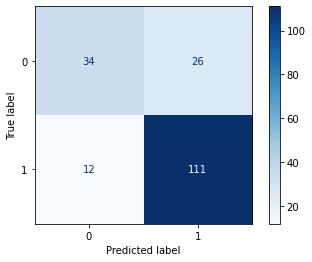

In [55]:
#fitting the model with best parameter
#copy-paste of previous best model       
final_model= xgboost.XGBClassifier(base_score=None, booster='gbtree', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.5, gamma=0.5,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=None, max_depth=15,
              min_child_weight=8, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method='hist',
              validate_parameters=None, verbosity=None)

#fitting
cm=final_model.fit(X, y )

#make a prediction based on the final model 
y_pred1 = cm.predict(X)
pred_xgboost=final_model.predict(X)

#plot with better/improved results

plt.figure()
plot_confusion_matrix(final_model, X, y, cmap=plt.cm.Blues)